# Building The Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
# from pyzipcode import ZipCodeDatabase 
import timeit
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
final = pd.read_csv("cc_transactions_created_variables.csv",index_col=0)

In [3]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_merchnum_state_actual/toal_180,card_merchnum_state_count_0_by_7,card_merchnum_state_count_0_by_14,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.500000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,...,0.134416,0.142857,0.035714,0.016667,0.142857,0.035714,0.016667,0.142857,0.035714,0.016667
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,...,1.000000,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,...,0.487870,0.142857,0.071429,0.011111,0.142857,0.071429,0.011111,0.142857,0.071429,0.011111


In [4]:
top_30_vars = pd.read_csv("Wrapper_Forward_Results.csv",index_col=0)

In [5]:
top_30_vars

,Variable Name
0,card_zip_total_7
1,card_merchnum_zip_total_7
2,card_state_total_7
3,card_merchdesc_total_7
4,card_merchdesc_total_14
5,card_state_total_1
6,card_merchnum_zip_total_14
7,card_state_total_14
8,card_merchnum_state_total_1
9,card_zip_total_30


In [6]:
top_vars = list(top_30_vars['Variable Name'])

In [7]:
df_model = final[top_vars]

In [8]:
df_model.head()

,card_zip_total_7,card_merchnum_zip_total_7,card_state_total_7,card_merchdesc_total_7,card_merchdesc_total_14,card_state_total_1,card_merchnum_zip_total_14,card_state_total_14,card_merchnum_state_total_1,card_zip_total_30,...,card_zip_total_0,card_merchnum_max_3,card_state_max_30,merchnum_state_total_1,card_merchdesc_max_1,merchnum_zip_total_1,card_merchnum_zip_max_1,merchnum_state_max_0,merchnum_zip_total_0,card_merchdesc_max_180
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,7.24,3.62,7.24,3.62,3.62,7.24,3.62
4,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,...,7.24,3.62,3.62,10.86,3.62,10.86,3.62,3.62,10.86,3.62


### Z-Scaling

In [9]:
df_model = (df_model-df_model.mean()) / df_model.std()
df_model

,card_zip_total_7,card_merchnum_zip_total_7,card_state_total_7,card_merchdesc_total_7,card_merchdesc_total_14,card_state_total_1,card_merchnum_zip_total_14,card_state_total_14,card_merchnum_state_total_1,card_zip_total_30,...,card_zip_total_0,card_merchnum_max_3,card_state_max_30,merchnum_state_total_1,card_merchdesc_max_1,merchnum_zip_total_1,card_merchnum_zip_max_1,merchnum_state_max_0,merchnum_zip_total_0,card_merchdesc_max_180
0,-0.171937,-0.167033,-0.211571,-0.165501,-0.181367,-0.161578,-0.183715,-0.254346,-0.148173,-0.226775,...,-0.201335,-0.431423,-0.543149,-0.257531,-0.424627,-0.257741,-0.424521,-0.494219,-0.273379,-0.523000
1,-0.165177,-0.160257,-0.205022,-0.158717,-0.174696,-0.154719,-0.177044,-0.248176,-0.141258,-0.220377,...,-0.190736,-0.404023,-0.521739,-0.251183,-0.397112,-0.251394,-0.397004,-0.466710,-0.263620,-0.499188
2,-0.129414,-0.124412,-0.170376,-0.122826,-0.139406,-0.118433,-0.141755,-0.215535,-0.104676,-0.186528,...,-0.134667,-0.259066,-0.408472,-0.217602,-0.251545,-0.217814,-0.251429,-0.321183,-0.211993,-0.373212
3,-0.171937,-0.167033,-0.211571,-0.165501,-0.181367,-0.161578,-0.183715,-0.254346,-0.148173,-0.226775,...,-0.201335,-0.431423,-0.543149,-0.256704,-0.424627,-0.256914,-0.424521,-0.494219,-0.272108,-0.523000
4,-0.171057,-0.166151,-0.210718,-0.164618,-0.180498,-0.160685,-0.182847,-0.253543,-0.147272,-0.225942,...,-0.199955,-0.431423,-0.543149,-0.255877,-0.424627,-0.256088,-0.424521,-0.494219,-0.270837,-0.523000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,-0.152199,-0.147250,-0.192449,-0.145692,-0.161890,-0.141551,-0.164238,-0.236331,-0.127983,-0.208094,...,-0.170389,-0.351420,-0.480635,-0.238997,-0.344287,-0.239208,-0.344177,-0.413900,-0.244885,-0.453473
96393,-0.143941,-0.138973,-0.003648,-0.137405,-0.009805,-0.133172,-0.012154,0.382068,-0.119536,-0.062221,...,-0.157442,-0.317948,0.520730,-0.231242,-0.310674,-0.231454,-0.310562,-0.380296,-0.232964,-0.012289
96394,-0.084409,-0.079306,-0.109853,-0.077661,-0.094998,-0.055044,-0.097347,-0.158514,-0.058642,-0.143934,...,-0.064110,-0.076656,-0.265939,1.061622,-0.068367,1.061342,-0.068241,1.964087,1.754664,-0.214687
96395,0.362658,0.368779,0.306312,0.371000,0.346150,0.380825,0.343799,0.233574,0.398656,0.404304,...,0.636792,1.735394,1.149972,1.048000,1.751308,1.047721,1.751535,1.681136,0.498347,1.360088


In [10]:
df_model["Fraud"] = final["Fraud"]
df_model["Date"] = final["Date"]

In [11]:
model = df_model[df_model.Date <= '2010-08-31']
oot = df_model[df_model.Date > '2010-08-31']

In [12]:
print(model.shape)
print(oot.shape)

(69046, 32)
(27351, 32)


In [13]:
len(model[model.Fraud == 1])

703

In [14]:
model.head()

,card_zip_total_7,card_merchnum_zip_total_7,card_state_total_7,card_merchdesc_total_7,card_merchdesc_total_14,card_state_total_1,card_merchnum_zip_total_14,card_state_total_14,card_merchnum_state_total_1,card_zip_total_30,...,card_state_max_30,merchnum_state_total_1,card_merchdesc_max_1,merchnum_zip_total_1,card_merchnum_zip_max_1,merchnum_state_max_0,merchnum_zip_total_0,card_merchdesc_max_180,Fraud,Date
0,-0.171937,-0.167033,-0.211571,-0.165501,-0.181367,-0.161578,-0.183715,-0.254346,-0.148173,-0.226775,...,-0.543149,-0.257531,-0.424627,-0.257741,-0.424521,-0.494219,-0.273379,-0.523000,0,2010-01-01
1,-0.165177,-0.160257,-0.205022,-0.158717,-0.174696,-0.154719,-0.177044,-0.248176,-0.141258,-0.220377,...,-0.521739,-0.251183,-0.397112,-0.251394,-0.397004,-0.466710,-0.263620,-0.499188,0,2010-01-01
2,-0.129414,-0.124412,-0.170376,-0.122826,-0.139406,-0.118433,-0.141755,-0.215535,-0.104676,-0.186528,...,-0.408472,-0.217602,-0.251545,-0.217814,-0.251429,-0.321183,-0.211993,-0.373212,0,2010-01-01
3,-0.171937,-0.167033,-0.211571,-0.165501,-0.181367,-0.161578,-0.183715,-0.254346,-0.148173,-0.226775,...,-0.543149,-0.256704,-0.424627,-0.256914,-0.424521,-0.494219,-0.272108,-0.523000,0,2010-01-01
4,-0.171057,-0.166151,-0.210718,-0.164618,-0.180498,-0.160685,-0.182847,-0.253543,-0.147272,-0.225942,...,-0.543149,-0.255877,-0.424627,-0.256088,-0.424521,-0.494219,-0.270837,-0.523000,0,2010-01-01


In [15]:
x_trntst = model.iloc[:,0:30]
y_trntst = model[["Fraud"]]

x_oot = oot.iloc[:,0:30]
y_oot = oot[["Fraud"]]

In [16]:
nitermax = 10

FDR3 = pd.DataFrame(np.zeros((nitermax, 3)))
FDR3.columns = ['trn', 'tst', 'oot']
FDR3

,trn,tst,oot
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


### Neural Network

In [53]:
for niter in range(nitermax):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(x_trntst,y_trntst,test_size=0.3)
    
    model=MLPClassifier(hidden_layer_sizes=(10),
                       activation='relu',
                       max_iter=2000,
                       alpha=0.0001,
                       solver='sgd',
                       verbose=0,
                       tol=0.00001,
                       learning_rate='adaptive',
                       learning_rate_init=0.01)
    
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=x_oot.values
    Y_tst_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=y_oot.values
    
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=x_oot.copy()
    
    model.fit(X_trn, Y_trn.values.ravel())
    
    predictions = model.predict_proba(X_trn)[:,1]
    X_trn_eval['predicted'] = predictions
    X_trn_eval["Fraud"] = Y_trn["Fraud"]
    topRows = int(round(X_trn_eval.shape[0]*0.03))
    temp = X_trn_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(X_tst)[:,1]
    X_tst_eval['predicted'] = predictions
    X_tst_eval["Fraud"] = Y_tst["Fraud"]
    topRows = int(round(X_tst_eval.shape[0]*0.03))
    temp = X_tst_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(x_oot)[:,1]
    X_oot_eval['predicted'] = predictions
    X_oot_eval["Fraud"] = y_oot["Fraud"]
    topRows = int(round(X_oot_eval.shape[0]*0.03))
    temp = X_oot_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot_eval.loc[:,'Fraud'])
    
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'], FDR3.loc[niter, 'oot'])

0 0.7790927021696252 0.7755102040816326 0.6404494382022472
1 0.7862745098039216 0.772020725388601 0.6095505617977528
2 0.7739307535641547 0.7452830188679245 0.6404494382022472
3 0.7851239669421488 0.7671232876712328 0.6376404494382022
4 0.7755102040816326 0.7793427230046949 0.6039325842696629
5 0.7731958762886598 0.7385321100917431 0.6376404494382022
6 0.7545638945233266 0.7761904761904762 0.6320224719101124
7 0.7632093933463796 0.75 0.6067415730337079
8 0.7789256198347108 0.7579908675799086 0.601123595505618
9 0.7796257796257796 0.7837837837837838 0.5955056179775281


In [54]:
FDR3.mean()

trn    0.774945
tst    0.764578
oot    0.620506
dtype: float64

In [46]:
# best_nn = FDR3.mean()
best_nn

trn    0.852911
tst    0.795166
oot    0.644101
dtype: float64

### Logistic Regression

In [87]:
for niter in range(nitermax):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(x_trntst,y_trntst,test_size=0.3)
    
    model = LogisticRegression(penalty = 'l2',
                              C = 0.1,
                              solver = 'lbfgs',
                              l1_ratio = 'none')
    
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=x_oot.values
    Y_tst_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=y_oot.values
    
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=x_oot.copy()
    
    model.fit(X_trn, Y_trn.values.ravel())
    
    predictions = model.predict_proba(X_trn)[:,1]
    X_trn_eval['predicted'] = predictions
    X_trn_eval["Fraud"] = Y_trn["Fraud"]
    topRows = int(round(X_trn_eval.shape[0]*0.03))
    temp = X_trn_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(X_tst)[:,1]
    X_tst_eval['predicted'] = predictions
    X_tst_eval["Fraud"] = Y_tst["Fraud"]
    topRows = int(round(X_tst_eval.shape[0]*0.03))
    temp = X_tst_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(x_oot)[:,1]
    X_oot_eval['predicted'] = predictions
    X_oot_eval["Fraud"] = y_oot["Fraud"]
    topRows = int(round(X_oot_eval.shape[0]*0.03))
    temp = X_oot_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot_eval.loc[:,'Fraud'])
    
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'], FDR3.loc[niter, 'oot'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


0 0.670020120724346 0.6650485436893204 0.5365168539325843


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


1 0.6534446764091858 0.6830357142857143 0.5365168539325843


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


2 0.6588693957115009 0.7 0.5561797752808989


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


3 0.675146771037182 0.6822916666666666 0.547752808988764


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


4 0.6740890688259109 0.6794258373205742 0.5589887640449438


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


5 0.6540880503144654 0.668141592920354 0.5337078651685393


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


6 0.6693711967545639 0.680952380952381 0.5421348314606742


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


7 0.6424116424116424 0.6981981981981982 0.5393258426966292


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


8 0.6774193548387096 0.642512077294686 0.5449438202247191


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


9 0.6666666666666666 0.6727272727272727 0.547752808988764


In [88]:
FDR3.mean()

trn    0.664153
tst    0.677233
oot    0.544382
dtype: float64

In [59]:
best_log = FDR3.mean()
best_log

trn    0.676199
tst    0.690352
oot    0.542697
dtype: float64

### Gradient Boosting Tree

In [101]:
for niter in range(nitermax):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(x_trntst,y_trntst,test_size=0.3)
    
   
    model = GradientBoostingClassifier(learning_rate=0.01,
                              n_estimators=100,
                              max_depth=3,
                              max_features=5,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              subsample=1)
   
    
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=x_oot.values
    Y_tst_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=y_oot.values
    
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=x_oot.copy()
    
    model.fit(X_trn, Y_trn.values.ravel())
    
    predictions = model.predict_proba(X_trn)[:,1]
    X_trn_eval['predicted'] = predictions
    X_trn_eval["Fraud"] = Y_trn["Fraud"]
    topRows = int(round(X_trn_eval.shape[0]*0.03))
    temp = X_trn_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(X_tst)[:,1]
    X_tst_eval['predicted'] = predictions
    X_tst_eval["Fraud"] = Y_tst["Fraud"]
    topRows = int(round(X_tst_eval.shape[0]*0.03))
    temp = X_tst_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(x_oot)[:,1]
    X_oot_eval['predicted'] = predictions
    X_oot_eval["Fraud"] = y_oot["Fraud"]
    topRows = int(round(X_oot_eval.shape[0]*0.03))
    temp = X_oot_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot_eval.loc[:,'Fraud'])
    
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'], FDR3.loc[niter, 'oot'])

0 0.718052738336714 0.7380952380952381 0.5084269662921348
1 0.7452229299363057 0.7068965517241379 0.5561797752808989
2 0.731404958677686 0.680365296803653 0.5421348314606742
3 0.7006237006237006 0.7162162162162162 0.5224719101123596
4 0.7405940594059406 0.7222222222222222 0.5814606741573034
5 0.7447257383966245 0.7336244541484717 0.5955056179775281
6 0.7326530612244898 0.7230046948356808 0.550561797752809
7 0.7261410788381742 0.7013574660633484 0.5252808988764045
8 0.751004016064257 0.7463414634146341 0.5337078651685393
9 0.7398058252427184 0.675531914893617 0.5280898876404494


In [102]:
FDR3.mean()

trn    0.733023
tst    0.714366
oot    0.544382
dtype: float64

In [93]:
best_gbt = FDR3.mean()
best_gbt

trn    0.983638
tst    0.879998
oot    0.636517
dtype: float64

### Random Forest 

In [28]:
for niter in range(nitermax):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(x_trntst,y_trntst,test_size=0.3)
    
   
    model = RandomForestClassifier(bootstrap = True,
                                  n_estimators = 500,
                                  max_depth = None,
                                  max_features = 20,
                                  min_samples_leaf = 15,
                                  min_samples_split = 2,
                                  criterion = 'gini')
   
    
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=x_oot.values
    Y_tst_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=y_oot.values
    
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=x_oot.copy()
    
    model.fit(X_trn, Y_trn.values.ravel())
    
    predictions = model.predict_proba(X_trn)[:,1]
    X_trn_eval['predicted'] = predictions
    X_trn_eval["Fraud"] = Y_trn["Fraud"]
    topRows = int(round(X_trn_eval.shape[0]*0.03))
    temp = X_trn_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(X_tst)[:,1]
    X_tst_eval['predicted'] = predictions
    X_tst_eval["Fraud"] = Y_tst["Fraud"]
    topRows = int(round(X_tst_eval.shape[0]*0.03))
    temp = X_tst_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions = model.predict_proba(x_oot)[:,1]
    X_oot_eval['predicted'] = predictions
    X_oot_eval["Fraud"] = y_oot["Fraud"]
    topRows = int(round(X_oot_eval.shape[0]*0.03))
    temp = X_oot_eval.sort_values('predicted', ascending = False).head(topRows)
    needed = temp.loc[:, 'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot_eval.loc[:,'Fraud'])
    
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'], FDR3.loc[niter, 'oot'])

0 0.993801652892562 0.8812785388127854 0.6544943820224719
1 0.9822485207100592 0.9030612244897959 0.6573033707865169
2 0.9957627118644068 0.8181818181818182 0.6432584269662921
3 0.991701244813278 0.8687782805429864 0.651685393258427
4 0.98046875 0.9057591623036649 0.6207865168539326
5 0.9939024390243902 0.8767772511848341 0.6432584269662921
6 0.98989898989899 0.8509615384615384 0.6601123595505618
7 0.9800399201596807 0.8514851485148515 0.651685393258427
8 0.9937888198757764 0.8636363636363636 0.6292134831460674
9 0.9897330595482546 0.8888888888888888 0.651685393258427


In [41]:
FDR3.mean()

trn    0.989135
tst    0.870881
oot    0.646348
dtype: float64

In [118]:
best_rf = FDR3.mean()
best_rf

trn    0.985253
tst    0.875273
oot    0.650000
dtype: float64

In [42]:
best_random_forest_model = model
best_random_forest_model

RandomForestClassifier(max_features=20, min_samples_leaf=15, n_estimators=500)

# Tables For Report

In [17]:
X_trn,X_tst,Y_trn,Y_tst=train_test_split(x_trntst,y_trntst,test_size=0.3)

In [39]:
def fdr_RF(model,X_data,Y_data):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    total_bads = Y_data['fraud_label'][Y_data['fraud_label']==1].count()
    top_rows = int(len(X_data)*.03)
    sum_bads = Y_data['fraud_label'].head(top_rows)[Y_data['fraud_label']==1].count()
    fdr = sum_bads/total_bads
    return fdr*100

time_results = pd.datetime.now()
results_dict_RF = {}

print(fdr_RF(vars))

for i in range(1,13):
    curr_time = pd.datetime.now()
    model_name = "random_forest_"+str(i)
    results_dict_RF[model_name] = {'fdr':{}}
    
    print(results_dict_RF[model_name])
    print(fdr_RF(vars()[model_name],X_trn,Y_trn))
    # calculate fdr for training, testing, and validation sets
    results_dict_RF[model_name]['fdr']['train_fdr_30']=fdr_RF(vars()[model_name],X_trn,Y_trn)
    results_dict_RF[model_name]['fdr']['test_fdr_30']=fdr_RF(vars()[model_name],X_tst,Y_tst)
    results_dict_RF[model_name]['fdr']['oot_fdr_30']=fdr_RF(vars()[model_name],x_oot,y_oot)

    print("Done with:",model_name, "; time:",pd.datetime.now()-curr_time)

    print("DONE!", pd.datetime.now()-time_results)

# Get the best model number with highest test fdr
for k,v in results_dict_RF.items():
    maximum_key = max(results_dict_RF, key=lambda v: results_dict_RF[v]['fdr']['test_fdr_30'])
    vars()[maximum_key]

<function fdr_RF at 0x7fa0e12b2550>
{'fdr': {}}


<ipython-input-39-c5b11200645c>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  time_results = pd.datetime.now()
<ipython-input-39-c5b11200645c>:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


KeyError: 'random_forest_1'

In [27]:
def output_table(y_res_valid,Y_valid):
    # returs the output tables
    # y_res_valis is y_pred
    # Y_valid is y_true
    # returns:
    # cumulative dataset, Bin Statistics
    no_of_bads =Y_valid.sum()
    no_of_records = len(Y_valid)
    no_of_goods = no_of_records - no_of_bads
    print('no_of_records',no_of_records)
    print('No of bads',no_of_bads)
    print('no_of_goods',no_of_goods)

    fin_tabl_df = pd.DataFrame({'score':y_res_valid,'label': Y_valid}).sort_values(by='score',ascending=False)
    df_pres_cum = pd.DataFrame(columns=['Total # Records','# Goods','# Bads'])

    for i_tbl_df in range(1,21): #21 is the final
        # print(i_tbl_df)
        top3_res2 = fin_tabl_df.head(round(Y_valid.shape[0]*(i_tbl_df/100)))
        top3_res2#['label'].sum()/sum(Y_valid)
        # print('No of records:',top3_res2.shape[0])
        df_pres_cum.loc[i_tbl_df-1,'Total # Records'] = top3_res2.shape[0]
        # print('No of bads:',top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Bads'] = top3_res2['label'].sum()
        # print('No of goods:',top3_res2.shape[0]- top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Goods'] = top3_res2.shape[0]- top3_res2['label'].sum()

    df_pres = df_pres_cum.diff()
    df_pres.loc[0] = df_pres_cum.loc[0]
    df_pres = df_pres.rename(columns={"Total # Records": "# Records"})
    df_pres['% Goods'] = 100*(df_pres['# Goods']/df_pres['# Records'])
    df_pres['% Bads'] = 100*(df_pres['# Bads']/df_pres['# Records'])
    print('Bin statistics')
    df_pres.to_csv(path+'Test_Bin_stats.csv')
    display(df_pres)

    df_pres_cum['% Goods'] = 100*(df_pres_cum['# Goods']/no_of_goods)
    df_pres_cum['% Bads'] = 100*(df_pres_cum['# Bads']/no_of_bads)
    df_pres_cum['KS'] = df_pres_cum['% Bads'] - df_pres_cum['% Goods']
    df_pres_cum['FPR'] = df_pres_cum['# Goods']/df_pres_cum['# Bads']
    df_pres_cum = df_pres_cum.rename(columns={"# Goods": "Cumulative Goods",'# Bads':'Cumulative Bads','% Bads':'% Bads (FDR)'})
    print('Cumulative results')
    #df_pres_cum.to_csv(path+'Test_Cum_stats.csv') To save into a csv file
    display(df_pres_cum)
    
    return df_pres_cum, df_pres


In [29]:
# Concatenating Fraud probability fitted with the best model with actual fraud label for calculating bin statistics
Y_train['Fraud Proba'] = vars()[maximum_key].predict_proba(X_trn)[:,1].tolist()
Y_test['Fraud Proba'] = vars()[maximum_key].predict_proba(X_tst)[:,1].tolist()
Y_oot['Fraud Proba'] = vars()[maximum_key].predict_proba(x_oot)[:,1].tolist()

NameError: name 'maximum_key' is not defined

In [ ]:
# Training Set
output_table(Y_train['Fraud Proba'],Y_train['fraud_label'])

In [ ]:
# Testing Set
output_table(Y_test['Fraud Proba'],Y_test['fraud_label'])

In [ ]:
# OOT Set
output_table(Y_oot['Fraud Proba'],Y_oot['fraud_label'])

In [55]:
def output_table(y_res_valid,Y_valid):
    # returs the output tables
    # y_res_valis is y_pred
    # Y_valid is y_true
    # returns:
    # cumulative dataset, Bin Statistics
    no_of_bads =Y_valid.sum()
    no_of_records = len(Y_valid)
    no_of_goods = no_of_records - no_of_bads
    print('no_of_records',no_of_records)
    print('No of bads',no_of_bads)
    print('no_of_goods',no_of_goods)

    fin_tabl_df = pd.DataFrame({'score':y_res_valid,'label': Y_valid}).sort_values(by='score',ascending=False)
    df_pres_cum = pd.DataFrame(columns=['Total # Records','# Goods','# Bads'])

    for i_tbl_df in range(1,21): #21 is the final
        # print(i_tbl_df)
        top3_res2 = fin_tabl_df.head(round(Y_valid.shape[0]*(i_tbl_df/100)))
        top3_res2#['label'].sum()/sum(Y_valid)
        # print('No of records:',top3_res2.shape[0])
        df_pres_cum.loc[i_tbl_df-1,'Total # Records'] = top3_res2.shape[0]
        # print('No of bads:',top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Bads'] = top3_res2['label'].sum()
        # print('No of goods:',top3_res2.shape[0]- top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Goods'] = top3_res2.shape[0]- top3_res2['label'].sum()

    df_pres = df_pres_cum.diff()
    df_pres.loc[0] = df_pres_cum.loc[0]
    df_pres = df_pres.rename(columns={"Total # Records": "# Records"})
    df_pres['% Goods'] = 100*(df_pres['# Goods']/df_pres['# Records'])
    df_pres['% Bads'] = 100*(df_pres['# Bads']/df_pres['# Records'])
    # print('Bin statistics')
    # df_pres.to_csv('Test_Bin_stats.csv')
    # display(df_pres)

    df_pres_cum['% Goods'] = 100*(df_pres_cum['# Goods']/no_of_goods)
    df_pres_cum['% Bads'] = 100*(df_pres_cum['# Bads']/no_of_bads)
    df_pres_cum['KS'] = df_pres_cum['% Bads'] - df_pres_cum['% Goods']
    df_pres_cum['FPR'] = df_pres_cum['# Goods']/df_pres_cum['# Bads']
    df_pres_cum = df_pres_cum.rename(columns={"# Goods": "Cumulative Goods",'# Bads':'Cumulative Bads','% Bads':'% Bads (FDR)'})
    # print('Cumulative results')
    
    # df_pres_cum.to_csv(path+'Test_Cum_stats.csv') To save into a csv file
    
    #display(df_pres_cum)
    return df_pres_cum, df_pres

In [53]:
# Concatenating Fraud probability fitted with the best model with actual fraud label for calculating bin statistics
Y_trn['Fraud Proba'] = best_random_forest_model.predict_proba(X_trn)[:,1].tolist()
Y_tst['Fraud Proba'] = best_random_forest_model.predict_proba(X_tst)[:,1].tolist()
y_oot['Fraud Proba'] = best_random_forest_model.predict_proba(x_oot)[:,1].tolist()

<ipython-input-53-03c03090aa69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_trn['Fraud Proba'] = best_random_forest_model.predict_proba(X_trn)[:,1].tolist()
<ipython-input-53-03c03090aa69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_tst['Fraud Proba'] = best_random_forest_model.predict_proba(X_tst)[:,1].tolist()
<ipython-input-53-03c03090aa69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [56]:
# Training Set 
df_pres_cum_trn, df_pres_trn = output_table(Y_trn['Fraud Proba'],Y_trn['Fraud'])

no_of_records 48332
No of bads 487
no_of_goods 47845


In [57]:
# df_pres_cum_trn.to_csv('trn_cum.csv')

In [58]:
# df_pres_trn.to_csv('trn.csv')

In [59]:
# Testing Set 
df_pres_cum_tst, df_pres_tst = output_table(Y_tst['Fraud Proba'],Y_tst['Fraud'])

no_of_records 20714
No of bads 216
no_of_goods 20498


In [60]:
# df_pres_cum_tst.to_csv('tst_cum.csv')

In [61]:
# df_pres_tst.to_csv('tst.csv')

In [62]:
# OOT Set
df_pres_cum_oot, df_pres_oot = output_table(y_oot['Fraud Proba'],y_oot['Fraud'])

no_of_records 27351
No of bads 356
no_of_goods 26995


In [63]:
# df_pres_cum_oot.to_csv('oot_cum.csv')

In [64]:
# df_pres_oot.to_csv('oot.csv')

In [67]:
df_pres_oot

,# Records,# Goods,# Bads,% Goods,% Bads
0,274,123,151,44.890511,55.109489
1,273,228,45,83.516484,16.483516
2,274,238,36,86.861314,13.138686
3,273,252,21,92.307692,7.692308
4,274,265,9,96.715328,3.284672
5,273,260,13,95.238095,4.761905
6,274,271,3,98.905109,1.094891
7,273,267,6,97.802198,2.197802
8,274,272,2,99.270073,0.729927
9,273,267,6,97.802198,2.197802


In [68]:
# Function to calculate savings
# Assuming $2000 gain for every True Positive
def fraud_savings(model,X_data, Y_data,i):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    # total_bads = Y_data['Fraud'][Y_data['Fraud']==1].count()
    top_rows = int(len(X_data)*i*.01)
    sum_bads = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==1].count()
    # loss = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==0].count()
    fraud_savings = sum_bads*2000
    return fraud_savings

In [69]:
# Function to calculate losses
# Assuming $50 loss for every False Positive
def fraud_losses(model,X_data, Y_data,i):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    # total_bads = Y_data['Fraud'][Y_data['Fraud']==1].count()
    top_rows = int(len(X_data)*i*.01)
    #sum_bads = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==1].count()
    loss = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==0].count()
    fraud_losses = loss*50
    return fraud_losses

In [70]:
# Calculating savings for FDR till 50%
savings = {}
for j in range(0,51):
    savings[j] = fraud_savings(best_random_forest_model,x_oot,y_oot,j)

In [71]:
# Calculating losses for FDR till 50%
losses = {}
for j in range(0,51):
    losses[j] = fraud_losses(best_random_forest_model,x_oot,y_oot,j)

In [72]:
# Calculating overall savings by subtracting losses from gains
overall_savings = {key: savings[key] - losses[key] for key in savings}

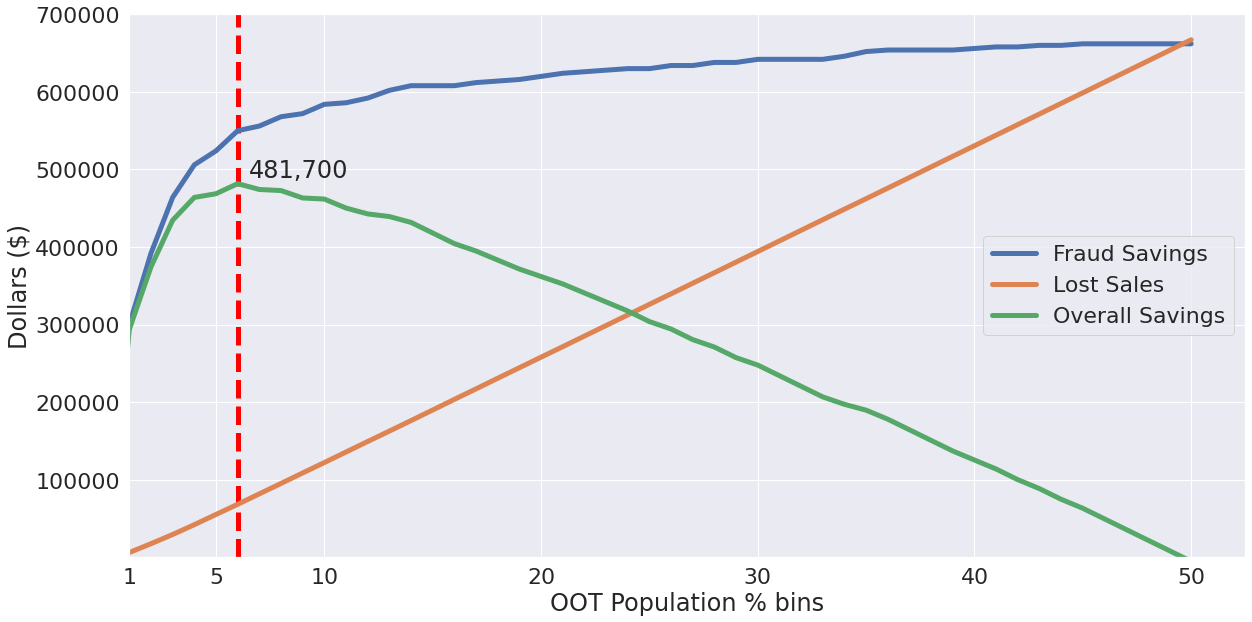

In [200]:
import matplotlib.pylab as plt

sns.set(font_scale=2)
lists = sorted(savings.items()) # sorted by key, return a list of tuples
# loss = sorted(losses.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
x,z = zip(*losses.items())
x,b = zip(*overall_savings.items())
axes = plt.axes()
plt.plot(x, y, label='Fraud Savings', linewidth = 5)
plt.plot(x,z, label = 'Lost Sales', linewidth = 5)
plt.plot(x,b, label = 'Overall Savings', linewidth = 5)
plt.ylim(ymin=1)
plt.xlim(xmin=1)
plt.xlabel("OOT Population % bins")
plt.ylabel("Dollars ($)")
plt.vlines(x=6, ymin=0, ymax=700000, color='red', zorder=2, linestyles='dashed', linewidth = 5)
axes.set_xticks([1,5,10,20,30,40,50])
plt.annotate('481,700',(6.5,490000))
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [84]:
# when the cutoff is 6%

print('savings: $', savings[6])
print('losses: $', losses[6])
print('overall savings: $', overall_savings[6])

savings: $ 550000
losses: $ 68300
overall savings: $ 481700


## More Graphs

In [125]:
temp = oot.join(final[['Cardnum','Merchnum']])
graphing = temp.join(y_oot['Fraud Proba'])

### Cardnum

In [174]:
graphing.groupby(['Cardnum'])['Fraud Proba'].mean().sort_values(ascending=False).head(20)

Cardnum
5142235211    0.500274
5142288601    0.438080
5142220919    0.425534
5142294097    0.371610
5142112858    0.366316
5142199009    0.288893
5142183973    0.259296
5142273038    0.251868
5142189945    0.230009
5142228988    0.223733
5142278415    0.223192
5142299705    0.222210
5142147267    0.183284
5142227637    0.177343
5142217059    0.165050
5142183210    0.140536
5142125025    0.133175
5142152857    0.130520
5142152302    0.121214
5142126798    0.112673
Name: Fraud Proba, dtype: float64

In [186]:
graphing[graphing['Cardnum'] == 5142235211].shape

(38, 35)

Text(0.5, 0, '')

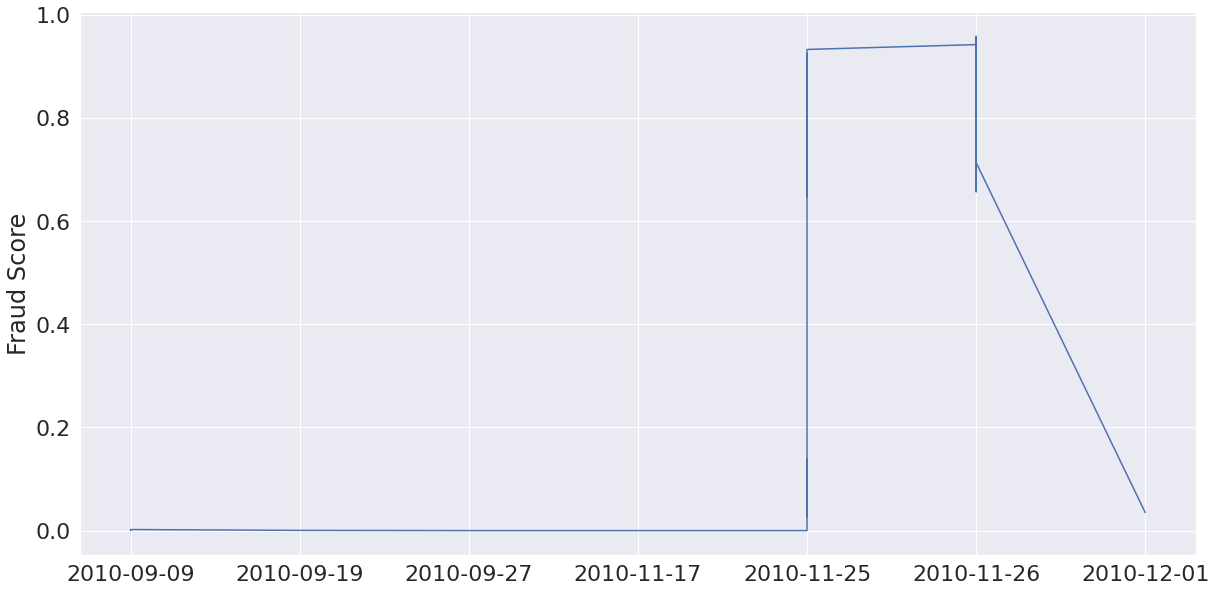

In [201]:
x = graphing[graphing['Cardnum'] == 5142235211]['Date']
y = graphing[graphing['Cardnum'] == 5142235211]['Fraud Proba']

sns.set(font_scale=2)
plt.plot(x,y)
plt.ylabel("Fraud Score")
plt.xlabel("")

Text(0.5, 0, 'Transaction Count With That Card Number')

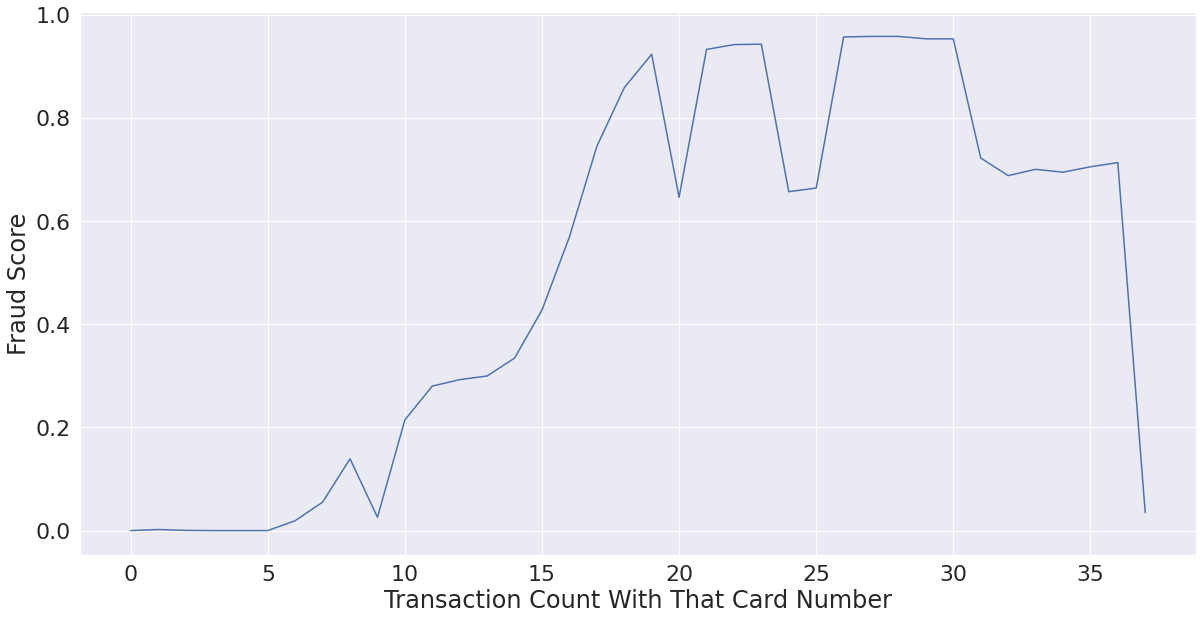

In [202]:
x = list(range(0,graphing[graphing['Cardnum'] == 5142235211].shape[0]))
y = graphing[graphing['Cardnum'] == 5142235211]['Fraud Proba']


sns.set(font_scale=2)
plt.plot(x,y)
plt.ylabel("Fraud Score")
plt.xlabel("Transaction Count With That Card Number")

### Merchnum

In [189]:
graphing.groupby(['Merchnum'])['Fraud Proba'].mean().sort_values(ascending=False).head(20)

Merchnum
467590957335     0.938756
8000924602       0.924669
806907277331     0.884346
5000507068272    0.877817
4574100693306    0.788862
6851300664361    0.635322
6070095870009    0.620720
6163608306809    0.607867
604906758338     0.596865
4112000606412    0.593333
8730008059686    0.579692
2036100687150    0.557382
1219000663138    0.546655
6005030600003    0.521013
5900000064440    0.488203
6898688857771    0.460682
5859560900441    0.450396
817004603228     0.444396
997670240334     0.437866
4620006308197    0.435807
Name: Fraud Proba, dtype: float64

In [196]:
graphing[graphing['Merchnum'] == '6070095870009'].shape

(28, 35)

Text(0.5, 0, '')

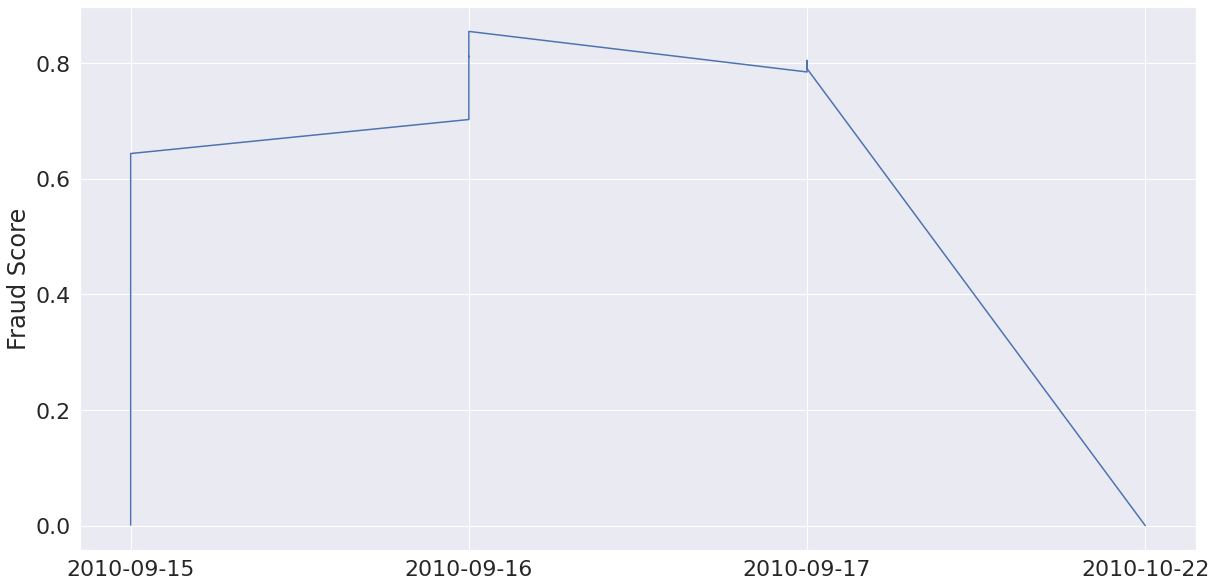

In [203]:
x = graphing[graphing['Merchnum'] == '6070095870009']['Date']
y = graphing[graphing['Merchnum'] == '6070095870009']['Fraud Proba']

sns.set(font_scale=2)
plt.plot(x,y)
plt.ylabel("Fraud Score")
plt.xlabel("")

Text(0.5, 0, 'Transaction Count With That Merchant Number')

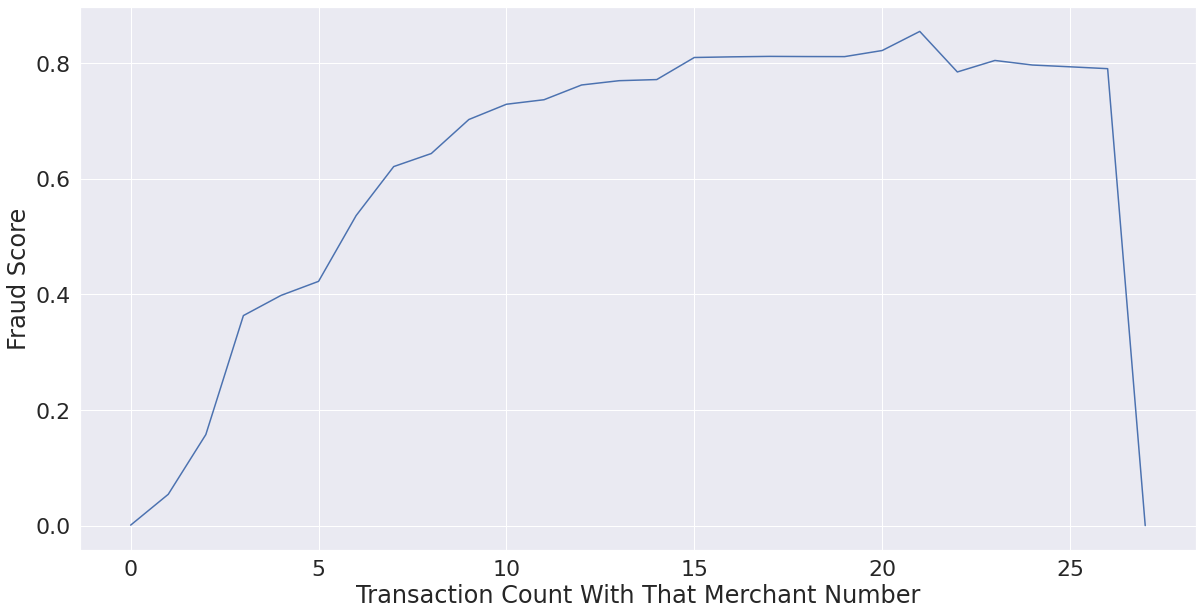

In [204]:
x = list(range(0,graphing[graphing['Merchnum'] == '6070095870009'].shape[0]))
y = graphing[graphing['Merchnum'] == '6070095870009']['Fraud Proba']


sns.set(font_scale=2)
plt.plot(x,y)
plt.ylabel("Fraud Score")
plt.xlabel("Transaction Count With That Merchant Number")